# Insurance Claims Analysis - Group Project ACT SCI 657

The team members of this project are:

- Patrick Hsun
- Dario Placencio

## Project Description

We will be working with an insurance company claims dataset to conduct risk analytics. The dataset contains information related to policyholders, incidents, claims, and other factors that can help in assessing risks associated with insurance policies. The primary objective of our analysis is to identify patterns and trends in the data that can provide insights into potential risks and fraud. By applying statistical methods and data analysis techniques, we aim to identify high-risk factors, assess the impact of incidents on claims, and develop models to predict the likelihood of fraudulent claims. Our analysis will help the insurance company to make data-driven decisions to mitigate and manage risks effectively, and improve their overall risk management strategy.

### Data Variables

The following are the variables of our dataset from the insurance company:

- months_as_customer: The number of months the customer has been with the insurance company.
- age: The age of the customer.
- policy_number: The unique identification number assigned to the insurance policy.
- policy_bind_date: The date when the insurance policy was bound or initiated.
- policy_state: The state where the insurance policy is applicable.
- policy_csl: The coverage limit of the insurance policy in the form of a combined single limit.
- policy_deductible: The deductible amount specified in the insurance policy.
- policy_annual_premium: The annual premium (cost) of the insurance policy.
- umbrella_limit: The maximum coverage limit provided by an umbrella policy.
- insured_zip: The ZIP code of the insured's residence.
- insured_sex: The gender of the insured.
- insured_education_level: The educational level of the insured.
- insured_occupation: The occupation of the insured.
- insured_hobbies: The hobbies or recreational activities of the insured.
- insured_relationship: The relationship of the insured with the policyholder.
- capital-gains: The amount of capital gains made by the insured.
- capital-loss: The amount of capital losses incurred by the insured.
- incident_date: The date when an incident or accident occurred.
- incident_type: The type of incident or accident.
- collision_type: The type of collision in case of an accident.
- incident_severity: The severity of the incident or accident.
- authorities_contacted: The authorities or agencies contacted after the incident.
- incident_state: The state where the incident occurred.
- incident_city: The city where the incident occurred.
- incident_location: The specific location where the incident occurred.
- incident_hour_of_the_day: The hour of the day when the incident occurred.
- number_of_vehicles_involved: The number of vehicles involved in the incident.
- property_damage: Indicates whether property damage occurred in the incident.
- bodily_injuries: The number of bodily injuries reported in the incident.
- witnesses: The presence witnesses present during the incident.
- police_report_available: Indicates whether a police report is available for the incident.
- total_claim_amount: The total amount claimed for the incident.
- injury_claim: The amount claimed for bodily injuries in the incident.
- property_claim: The amount claimed for property damage in the incident.
- vehicle_claim: The amount claimed for vehicle damage in the incident.
- auto_make: The make or manufacturer of the insured vehicle.
- auto_model: The model of the insured vehicle.
- auto_year: The manufacturing year of the insured vehicle.
- fraud_reported: Indicates whether fraud was reported for the claim.
_c39: This column seems to be an unnamed or unassigned column, possibly an artifact of the dataset or data processing. Its purpose is unclear.

### Data Source

The data is sourced from Kaggle, it can be accessed through the following link:

https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data?datasetId=45152&sortBy=voteCount

# Data Reading

In [56]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
# Read the xls file
df=pd.read_excel('insurance_claims.xlsx')

In [58]:
# Preview the data
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [59]:
# List the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Exploratory Data Analysis

In [60]:
# Summary the numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [61]:
# Info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [62]:
# Filet the columns with null values
df.isnull().sum()[df.isnull().sum()>0]

_c39    1000
dtype: int64

In [63]:
# Drop _c39 column
df.drop('_c39',axis=1,inplace=True)

In [64]:
# Replace the '?' with nan
df.replace('?',np.nan,inplace=True)

In [65]:
# Total amount of rows
df.shape

(1000, 39)

In [66]:
# Create a list of column names with data type non-numerical
cat_cols=df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [67]:
# Add the policy number, insurance zip, insurance location to the cat_cols list
cat_cols.extend(['policy_number','insured_zip'])

In [68]:
# Create a funciton to count the unique values in each column
def unique_values(df):
    for i in df.columns:
        print(i,df[i].nunique())

In [69]:
# Apply the function to the categorical columns
unique_values(df[cat_cols])

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
property_damage 2
police_report_available 2
auto_make 14
auto_model 39
fraud_reported 2
policy_number 1000
insured_zip 995


From the set of categorical variables, we can see that some of them have over 900 different values, which is something to keep in mind as we go further into the prediciton models.

The variables on this condition are:

- policy_blind_date
- incident_location
- policy_number
- insured_zip

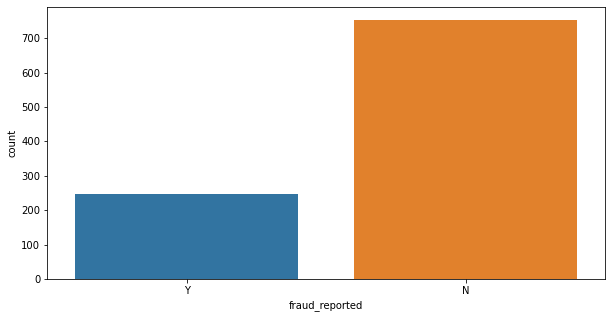

In [70]:
# Let's check the target variable by plotting fraud_reported
plt.figure(figsize=(10,5))
sns.countplot(df['fraud_reported']);

In [71]:
# Count the fraud_reported
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

There is a considerable difference between the fraud and non-fraud claims, but is expected given the nature of these events.

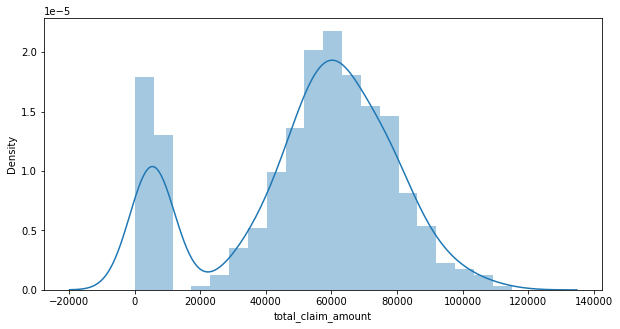

In [72]:
# Histogram of total claim amount
plt.figure(figsize=(10,5))
sns.distplot(df['total_claim_amount']);

In [73]:
# Count fraud by Incident State, for Y fraud_reported
df[df['fraud_reported']=='Y']['incident_state'].value_counts()

SC    73
NY    58
WV    39
NC    34
VA    25
OH    10
PA     8
Name: incident_state, dtype: int64

In [74]:
# Using a USA map to plot the count of fraud_reported = Y by state, color by number of fraud_reported

# Import the required libraries
import plotly.express as px
import plotly.graph_objects as go

# Create a dataframe with the count of fraud_reported = Y by state
df_state=df[df['fraud_reported']=='Y']['incident_state'].value_counts().reset_index()
df_state.columns=['state','count']

# Create a USA map
fig = go.Figure(data=go.Choropleth(
    locations=df_state['state'], # Spatial coordinates
    z = df_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Fraud Reported",
))

fig.update_layout(
    title_text = 'Fraud Reported by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

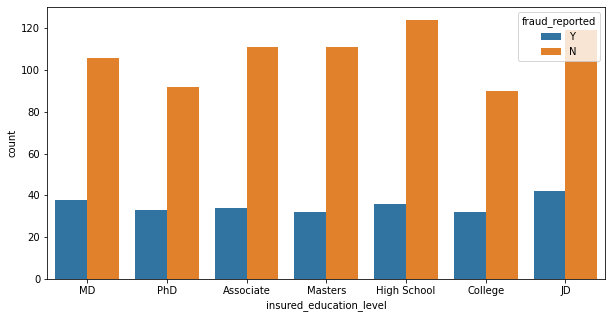

In [75]:
# Plot Breakdown of insuranced education claim group by fraud_reported
plt.figure(figsize=(10,5))
sns.countplot(df['insured_education_level'],hue=df['fraud_reported']);

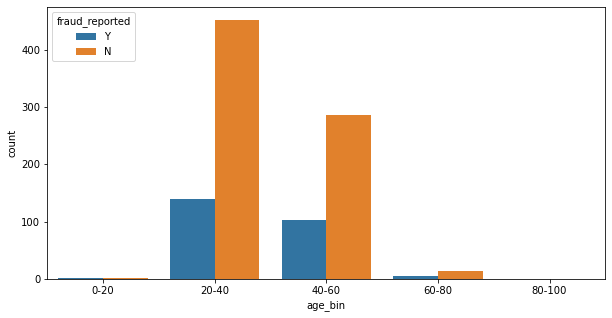

In [76]:
# Bin the age column group by fraud_reported
df['age_bin']=pd.cut(df['age'],bins=[0,20,40,60,80,100],labels=['0-20','20-40','40-60','60-80','80-100'])

# Plot Breakdown of insuranced age claim group by fraud_reported
plt.figure(figsize=(10,5))
sns.countplot(df['age_bin'],hue=df['fraud_reported']);  

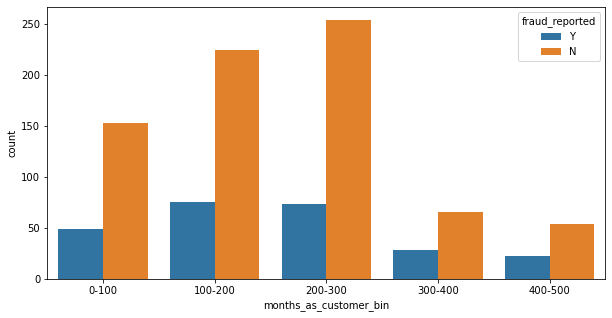

In [77]:
# Bin the months_as_customer column group by fraud_reported
df['months_as_customer_bin']=pd.cut(df['months_as_customer'],bins=[0,100,200,300,400,500],labels=['0-100','100-200','200-300','300-400','400-500'])

# Plot Breakdown of insuranced months_as_customer claim group by fraud_reported
plt.figure(figsize=(10,5))
sns.countplot(df['months_as_customer_bin'],hue=df['fraud_reported']);

# Data Preprocessing

Considering the for non-numerical variables we will have to generate dummy variables, let's drop the high volume distinct values variables. Let's also add incident date given the is a time series variable.

In [78]:
cols_to_drop=['policy_number','incident_location','policy_bind_date', 'insured_zip', 'incident_date', 'age_bin', 'months_as_customer_bin']

In [79]:
# Excluse the cols_to_drop from the cat_cols list
cat_cols=[i for i in cat_cols if i not in cols_to_drop]

In [80]:
# Drop the columns
df.drop(cols_to_drop,axis=1,inplace=True)

In [81]:
# Print the types of the cat_cols
df[cat_cols].dtypes

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [82]:
# Conver the cat_cols to object type
df[cat_cols]=df[cat_cols].astype('string')

In [83]:
# Set the column of cat_cols as factors
for i in cat_cols:
    df[i]=df[i].astype('category')        

In [84]:
# Replace the nan values with mode
for i in cat_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [85]:
# Generate the dummy variables for the cat_cols
df=pd.get_dummies(df,columns=cat_cols,drop_first=False)

# Check the shape of the data
df.shape

(1000, 160)

In [86]:
# Preview the data
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_N,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,0,0,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,1,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1,0,0,0,0,0,0,0,1,0


# GLM - Gamma Regression for Claim Amount Prediction

The purpose of the following section is to generate a prediction model for the claim amount. The model will be based on a Gamma Regression, which is a generalized linear model (GLM) for predicting continuous positive variables.

As a business problem, insurance companies need to be able to predict the claim amount in order to set the premium for the policy. The premium is the amount of money that the policy holder pays to the insurance company in order to be covered. As other option, the interest to predict claim amount might be rooted on the need to predict the amount of money that the insurance company will have to pay to the policy holder, in a case of a claim, so the company can set aside the resources to react to the claim.

In [113]:
# Describe total_claim_amount
df['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

In [114]:
# Import the sklearn required libraries
from sklearn.linear_model import GammaRegressor
from sklearn.preprocessing import StandardScaler     
from sklearn.model_selection import train_test_split

In [115]:
# Load the data and split into train and test sets
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create a gamma regression model
gamma_model = GammaRegressor()

# Fit the model on the training data
gamma_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gamma_model.predict(X_test)

In [116]:
# Import the performance metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [117]:
# Calculate the Model Performance Metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a function to calculate the adjusted R2
def adj_r2(X,y):
    r2 = gamma_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test, y_test))

R2 Score: 0.9032279261291358
MAE: 6399.919834662378
MSE: 65729364.59744215
Adjusted R2: 0.7655729966792183


The results suggest that the gamma regression model is a good fit for the data. The high R2 score of 0.903 indicates that the model is able to explain approximately 90.3% of the variance in the claim amount, which is considered a high level of explanation.

The MAE of 6399.92 is a relatively low value considering the range of claim amounts and indicates that the model's predictions are off by an average of $6,399.92.

The adjusted R2 of 0.765 indicates that the model's performance may be slightly impacted by the number of predictor variables used, which is common in regression analysis.

Overall, the results suggest that the gamma regression model is a good starting point for predicting claim amount and may provide relatively accurate predictions.

## Feature Selection

The Gamma model had a considerable amount of variables, for efficiency purposes in a business setting, and better understanding of the most important variables, we will proceed to generate feature selection through backward elimination.

In [118]:
# Count the variables in the model
print('Number of variables in the model:', len(gamma_model.coef_))

Number of variables in the model: 159


In [119]:
# Perform a backward feature selection through recursive feature elimination
from sklearn.feature_selection import RFE

# Create the RFE with a gamma regression estimator and 10 features to select
rfe = RFE(estimator=GammaRegressor(), n_features_to_select=10, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_scaled, y)

Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
F

RFE(estimator=GammaRegressor(), n_features_to_select=10, verbose=1)

In [120]:
# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

{'months_as_customer': 39, 'age': 86, 'policy_deductable': 92, 'policy_annual_premium': 84, 'umbrella_limit': 65, 'capital-gains': 126, 'capital-loss': 127, 'incident_hour_of_the_day': 8, 'number_of_vehicles_involved': 2, 'bodily_injuries': 103, 'witnesses': 37, 'injury_claim': 1, 'property_claim': 1, 'vehicle_claim': 1, 'auto_year': 24, 'policy_state_IL': 101, 'policy_state_IN': 144, 'policy_state_OH': 124, 'policy_csl_100/300': 25, 'policy_csl_250/500': 100, 'policy_csl_500/1000': 52, 'insured_sex_FEMALE': 97, 'insured_sex_MALE': 110, 'insured_education_level_Associate': 31, 'insured_education_level_College': 114, 'insured_education_level_High School': 99, 'insured_education_level_JD': 108, 'insured_education_level_MD': 120, 'insured_education_level_Masters': 132, 'insured_education_level_PhD': 23, 'insured_occupation_adm-clerical': 17, 'insured_occupation_armed-forces': 80, 'insured_occupation_craft-repair': 137, 'insured_occupation_exec-managerial': 69, 'insured_occupation_farming-

In [121]:
# Print the features that are not eliminated
print(X.columns[rfe.support_])

Index(['injury_claim', 'property_claim', 'vehicle_claim',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_Rear Collision', 'incident_severity_Trivial Damage',
       'authorities_contacted_None'],
      dtype='object')


In [122]:
# Create a dataframe with the features
df_features = pd.DataFrame({'feature':X.columns, 'rank':rfe.ranking_})

# Print the top 10 features
print(df_features.sort_values('rank').head(10))

                                   feature  rank
11                            injury_claim     1
72  incident_type_Single Vehicle Collision     1
73             incident_type_Vehicle Theft     1
75           collision_type_Rear Collision     1
80        incident_severity_Trivial Damage     1
13                           vehicle_claim     1
12                          property_claim     1
71                incident_type_Parked Car     1
70   incident_type_Multi-vehicle Collision     1
83              authorities_contacted_None     1


In [123]:
# rfe.support_ dimension
print(rfe.support_.shape)

(159,)


In [124]:
# Run the model with the selected features

# Load the data and split into train and test sets

# Select the features from the RFE
X = df[X.columns[rfe.support_]]
y = df['total_claim_amount']

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create a gamma regression model
gamma_model = GammaRegressor()

# Fit the model on the training data
gamma_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gamma_model.predict(X_test)

In [125]:
# Calculate the Model Performance Metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a function to calculate the adjusted R2
def adj_r2(X,y):
    r2 = gamma_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test, y_test))

R2 Score: 0.9299548625049532
MAE: 5625.192386427644
MSE: 47575940.00551911
Adjusted R2: 0.8570003484138443


In comparison to the previous Gamma model, the feature selection reduced Gamma model has higher R2 score (0.930 vs 0.903) indicating that it is able to explain more of the variance in the claim amount.

Moreover, the MAE of the feature selection reduced Gamma model is lower (5625.19 vs 6399.92) suggesting that the model's predictions are off by a smaller average amount, which is considered a good improvement.

The MSE of the feature selection reduced Gamma model is also lower (47,575,940.01 vs 65,729,364.60) indicating that the model's predictions have a smaller spread of errors.

Overall, the results suggest that the feature selection process has improved the performance of the Gamma model. The reduced set of predictors may have helped the model to better capture the underlying relationships between the predictor variables and the claim amount, leading to more accurate predictions.

# Weibull Regression for Total Claim Amount Prediction

A Weibull hazard model is beneficial for the insurance company in multiple ways. It helps assess risks and set appropriate prices for policies. By predicting future claim amounts, it assists in estimating necessary reserves. The model supports the development of tailored insurance products based on claim analysis. It also aids in minimizing losses by implementing risk prevention strategies. Additionally, it helps identify and prevent fraudulent claims. In summary, the Weibull hazard model enhances risk management, pricing, reserves, product development, loss prevention, and fraud detection for insurers.

In [262]:
# Split df into test and train sets, using random split
train, test = train_test_split(df, test_size=0.5, random_state=52)

In [363]:
# Fit a Weibull Harzard Model to predict the total_claim_amount, using the data in the df dataframe, with the rest of the columns as independent variables

from lifelines import WeibullAFTFitter

# Create a WeibullAFTFitter object
model = WeibullAFTFitter()

# Fit the model with 'total_claim_amount' as the dependent variable and the rest of the columns as independent variables
model.fit(train, duration_col='total_claim_amount')

# Get the estimated parameters of the model
print(model.print_summary())

<lifelines.WeibullAFTFitter: fitted with 500 total observations, 0 right-censored observations>
             duration col = 'total_claim_amount'
   number of observations = 500
number of events observed = 500
           log-likelihood = -4871.89
         time fit was run = 2023-05-10 21:42:38 UTC

---
                                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                                      
lambda_ age                                      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        authorities_contacted_Ambulance         -0.13       0.88        NaN              NaN              NaN                  NaN                  NaN
        authorities_contacted_Fire              -0.12       0.89        NaN              NaN              NaN                  NaN                  NaN
        authorities_contacted_None              -0.23       0.80        NaN              NaN              NaN                  NaN                  NaN
        authorities_contacted_Other             -0.12       0.89        NaN              NaN              NaN                  NaN                  NaN
        authorities_contacted_Police            -0.14       0.87        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Accura                        -0.11       0.90 1649494.78      -3232950.46       3232950.25                 0.00                  inf
        auto_make_Audi                          -0.13       0.88        NaN              NaN              NaN                  NaN                  NaN
        auto_make_BMW                           -0.12       0.89 1409495.60      -2762560.73       2762560.50                 0.00                  inf
        auto_make_Chevrolet                     -0.12       0.89  443785.12       -869802.98        869802.74                 0.00                  inf
        auto_make_Dodge                         -0.10       0.90        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Ford                          -0.12       0.88        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Honda                         -0.13       0.88 1430931.90      -2804575.11       2804574.86                 0.00                  inf
        auto_make_Jeep                          -0.12       0.89 1257234.62      -2464134.70       2464134.46                 0.00                  inf
        auto_make_Mercedes                      -0.09       0.92  665485.33      -1304327.37       1304327.19                 0.00                  inf
        auto_make_Nissan                        -0.12       0.89        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Saab                          -0.12       0.88        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Suburu                        -0.12       0.89        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Toyota                        -0.11       0.90        NaN              NaN              NaN                  NaN                  NaN
        auto_make_Volkswagen                    -0.12       0.89  437780.25       -858033.64        858033.41                 0.00                  inf
        auto_model_3 Series                     -0.12       0.88 1027265.65      -2013403.80       2013403.55                 0.00                  inf
        auto_model_92x                          -0.15       0.86        NaN              NaN              NaN                  NaN                  NaN
        auto_model_93                           -

None


In [364]:
# Predict the total_claim_amount
predicted_survival_times = model.predict_expectation(test)

In [372]:
import numpy as np
from scipy.stats import norm
from scipy.stats import rankdata

def pit_transform(predictions, actual_values):
    ranks = rankdata(actual_values) / (len(actual_values) + 1)
    transformed_values = np.zeros_like(predictions)
    transformed_values[np.argsort(predictions)] = ranks
    return transformed_values

actual_claim_amounts = test['total_claim_amount'].values

pit_values = pit_transform(predicted_survival_times, actual_claim_amounts)

print("PIT values:", pit_values)


PIT values: [0.43912176 0.57085828 0.91616766 0.92914172 0.27145709 0.1237525
 0.69860279 0.96606786 0.10179641 0.05289421 0.17964072 0.91317365
 0.02994012 0.38323353 0.18862275 0.43413174 0.04191617 0.25349301
 0.94011976 0.85628743 0.4750499  0.21956088 0.9261477  0.4251497
 0.8762475  0.97005988 0.51896208 0.83033932 0.26946108 0.21357285
 0.77045908 0.28942116 0.6506986  0.24151697 0.15668663 0.61676647
 0.98203593 0.03393214 0.81636727 0.5489022  0.81836327 0.62974052
 0.45708583 0.79640719 0.06187625 0.63872255 0.5249501  0.83333333
 0.55588822 0.86027944 0.99401198 0.98802395 0.60379242 0.8253493
 0.67065868 0.59281437 0.45309381 0.55588822 0.39121756 0.49700599
 0.28143713 0.51297405 0.68662675 0.69261477 0.51896208 0.29241517
 0.02095808 0.14670659 0.39620758 0.05788423 0.26047904 0.08183633
 0.57884232 0.0249501  0.499002   0.0489022  0.89820359 0.41716567
 0.3992016  0.44111776 0.2255489  0.8003992  0.05788423 0.56487026
 0.16167665 0.94810379 0.249501   0.14670659 0.405189

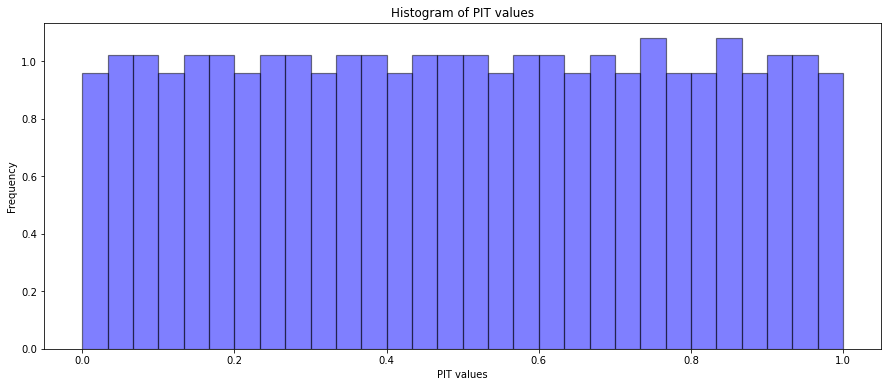

In [385]:
# Plot the PIT values as an Histogram

fig = plt.figure(figsize=(15, 6))
plt.hist(pit_values, bins=30, range=(0,1), color='blue', edgecolor='black', linewidth=1.2, alpha=0.5, label='PIT values', density=True)
plt.title('Histogram of PIT values')
plt.xlabel('PIT values')
plt.ylabel('Frequency')
plt.show();

# Count Data - Poisson Regression for Amount of Vehicles Involved in the Claim

The purpose of the following section is to generate a prediction model for the amount of vehicules involved in the claims. The model will be based on a Poisson Regression, which is a generalized linear model (GLM) for predicting count data.

By using a Poisson model to predict the number of vehicles involved in an accident claim, the insurance company can estimate the expected number of vehicles involved in a claim and assess the associated risk and potential financial impact. This information can be used to adjust premiums, determine appropriate reserves for future claims, and identify areas for risk mitigation.

Additionally, the insurance company can use the Poisson model to analyze the impact of different variables on the number of vehicles involved in a claim, such as the policyholder's age, sex, education level, occupation, or location. This information can be used to identify high-risk policyholders or regions and develop targeted risk management strategies.

In [128]:
# Describe the number of vehicle involded
df['number_of_vehicles_involved'].describe()

count    1000.00000
mean        1.83900
std         1.01888
min         1.00000
25%         1.00000
50%         1.00000
75%         3.00000
max         4.00000
Name: number_of_vehicles_involved, dtype: float64

In [129]:
from sklearn.linear_model import PoissonRegressor

In [130]:
# Fit a Poisson Model to Predict the Amount of vehicules involved

# Load the data and split into train and test sets
X = df.drop('number_of_vehicles_involved', axis=1)
y = df['number_of_vehicles_involved']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42)

# Scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Poisson regression model on the training data
poisson_model = PoissonRegressor()
poisson_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = poisson_model.predict(X_test_scaled)

In [131]:
# Evaluate the model performance
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Create a funciton to calculate the adjusted R2
def adj_r2(X,y):
    r2 = poisson_model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Calculate the adjusted R2
print('Adjusted R2:', adj_r2(X_test_scaled, y_test))

R2 Score: 0.8340154044998109
MAE: 0.31667806976968604
MSE: 0.17591773613715347
Adjusted R2: 0.7730402659893957


The results of the Poisson model suggest that the model is a good fit for the data, with an R2 score of 0.834 indicating that the model explains approximately 83% of the variance in the count of cars involved in an accident claim. This suggests that the model has a good ability to capture the underlying relationships between the predictor variables and the count of cars involved in the accident claim.

Additionally, the mean absolute error (MAE) of 0.317 suggests that the model's predictions are off by an average of 0.317, which is relatively small in the context of the data. This indicates that the model's predictions are quite accurate in terms of the count of cars involved in the accident claim.

Moreover, the mean squared error (MSE) of 0.176 suggests that the model's predictions have a relatively small spread of errors compared to the mean absolute error, which is another positive aspect of the model's performance.

Finally, the adjusted R2 of 0.773 suggests that the model's performance is not impacted significantly by the number of predictor variables used. Overall, the results suggest that the Poisson model is a good starting point for predicting the count of cars involved in an accident claim.

In [178]:
# Predict the number of vehicles involved in an accident for a random observation
print('Predicted number of vehicles involved:', poisson_model.predict(X_test_scaled[0].reshape(1,-1))[0])
print('Actual number of vehicles involved:', y_test.iloc[0])

Predicted number of vehicles involved: 1.145132203012557
Actual number of vehicles involved: 1


In [180]:
# Number of vehicles involved in the accident distribution
print('Number of vehicles involved in the accident distribution:')
print(y.value_counts(normalize=True))

Number of vehicles involved in the accident distribution:
1    0.581
3    0.358
4    0.031
2    0.030
Name: number_of_vehicles_involved, dtype: float64


In [186]:
# Import the Poisson PMF
from scipy.stats import poisson

# Create a function to calculate the probability of accidents involving 1, 2, 3, and 4 vehicles given the model, and returning a single percentage per number of vehicles using PMF, considering the any desired observation
def proba_vehicles(model, observation):
    # Create a list of the number of vehicles involved in the accident
    vehicles = [1,2,3,4]
    # Create an empty list to store the probabilities
    probabilities = []
    # Loop through the vehicles list
    for vehicle in vehicles:
        # Calculate the probability of the number of vehicles involved in the accident
        probability = poisson.pmf(vehicle, model.predict(observation)[0])
        # Append the probability to the list
        probabilities.append(probability)
    # Return the probabilities
    return probabilities

In [187]:
# Print the probabilities for the first observation
print('Probabilities:', proba_vehicles(poisson_model, X_test_scaled[0].reshape(1,-1)))

Probabilities: [0.3643602833192999, 0.20862034696385467, 0.07963262583732097, 0.022797471064191496]


In [189]:
# Print the actual number of vehicles involved in the first observation
print('Actual number of vehicles involved:', y_test.iloc[0])

Actual number of vehicles involved: 1


In [188]:
# Print the probabilities for the second observation
print('Probabilities:', proba_vehicles(poisson_model, X_test_scaled[1].reshape(1,-1)))

Probabilities: [0.18818959503421695, 0.2485744644641002, 0.21889011937625832, 0.14456297169496368]


In [190]:
# Print the actual number of vehicles involved in the second observation
print('Actual number of vehicles involved:', y_test.iloc[1])

Actual number of vehicles involved: 3


The previous generated tool can help calculate the probabilities for each of the possible results on any of the data rows, given the values of the predictor variables. It can be useful for assessing the likelihood of accidents with specific vehicle counts, which can inform decision-making, risk assessment, and policy development for the insurance company.

These probabilities may provide insights for insurance companies and policy makers when assessing risk and designing policies related to auto accidents. It may be helpful to investigate the causes of accidents involving multiple vehicles and to determine ways to mitigate these risks, such as improving road infrastructure and safety measures.

From the observations we can observed a close relationship between the predicted value, and their probability.

# Neural Network for Fraud Prediction

The following section is focused on generating a prediction model for the fraud probability. The model will be based on a Neural Network Model, which is a machine learning model that can be used to predict the probability of an event occurring.

As a business problem, a machine learning model can help insurance companies to detect and prevent fraud more accurately and efficiently, reducing financial losses and maintaining lower premiums for policyholders. By analyzing historical data and identifying patterns indicative of fraud, the model can prioritize investigations and allocate resources more effectively, improving overall risk management for the company.

In [195]:
# Check the df columns fraund_reported_Yes and fraud_reported_No
print(df['fraud_reported_Y'].value_counts())
print(df['fraud_reported_N'].value_counts())

0    753
1    247
Name: fraud_reported_Y, dtype: int64
1    753
0    247
Name: fraud_reported_N, dtype: int64


In [196]:
# Bring back the fraud_reported column into a single binary column, based on the fraud_reported column
df['fraud_reported'] = df['fraud_reported_Y']

In [197]:
# Drop the fraud_reported_Y and fraud_reported_N columns
df.drop(['fraud_reported_Y', 'fraud_reported_N'], axis=1, inplace=True)

In [198]:
# Define the dependent and independent variables
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [199]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=52)

In [200]:
# Fit a neural network model to predict fraud_reported using Keras

# Import the required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Create a function to create a neural network model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam=Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create a model
model = create_model()

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2544      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________
None


In [201]:
# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=20, verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 860us/step - loss: 101584.9141 - accuracy: 0.2560
Epoch 2/200
25/25 [==============================] - 0s 882us/step - loss: 95369.7031 - accuracy: 0.2560
Epoch 3/200
25/25 [==============================] - 0s 794us/step - loss: 89383.7891 - accuracy: 0.2560
Epoch 4/200
25/25 [==============================] - 0s 817us/step - loss: 83535.6016 - accuracy: 0.2560
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 77114.9531 - accuracy: 0.2560
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 63070.7383 - accuracy: 0.2560
Epoch 7/200
25/25 [==============================] - 0s 964us/step - loss: 46473.6055 - accuracy: 0.2560
Epoch 8/200
25/25 [==============================] - 0s 859us/step - loss: 31689.2637 - accuracy: 0.2560
Epoch 9/200
25/25 [==============================] - 0s 814us/step - loss: 17289.6465 - accuracy: 0.2560
Epoch 10/200
25/25 [==============================] - 0s 8

In [202]:
# Predict the model
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 639us/step


In [203]:
# Print the accuracy score
print(accuracy_score(y_test,y_pred.round()))

0.658


In [204]:
# Print the confusion matrix
print(confusion_matrix(y_test,y_pred.round()))

[[301  80]
 [ 91  28]]


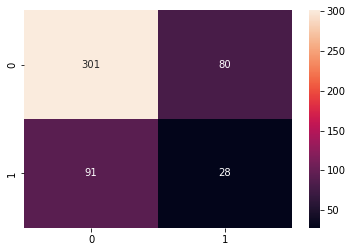

In [205]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='d');

The model accuracy does not to seem that great, with only a score of 66% accuracy. Let's see if we can improve it by hyperparameter tuning.

In [206]:
# Import required libraries
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define a function to create a Keras model
def create_model(learning_rate=0.01, activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define hyperparameters
param_grid = {'batch_size': [20, 40, 60, 80, 100],
                'epochs': [100, 200, 300, 400, 500],
                'learning_rate': [0.01, 0.001, 0.0001],
                'activation': ['relu', 'tanh']}

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the GridSearchCV object with the data
grid_result = grid.fit(X_train, y_train)

# Print the best score and best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/200
9/9 [==============================] - 0s 1000us/step - loss: 1664.0751 - accuracy: 0.7140
Epoch 2/200
9/9 [==============================] - 0s 938us/step - loss: 0.7890 - accuracy: 0.7380
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7440
Epoch 4/200
9/9 [==============================] - 0s 1000us/step - loss: 0.6329 - accuracy: 0.7440
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7440
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7440
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7440
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7440
Epoch 9/200
9/9 [==============================] - 0s 937us/step - loss: 0.5886 - accuracy: 0.7440
Epoch 10/200
9/9 [==============================] - 0s 938us/step - loss: 0.5841 - accuracy: 0.7440
Epoch 11/200
9

After model optimization we are able to improve accuracy from 63% to 75%, which is a good improvement. However, the model is still not very accurate, a good reason might be the imbalance of the data, which is something to keep in mind, but it's also the nature of fraud.

Still remains as a valid model for fraud prediction, and that the insurance company can use to first screen the claims and prioritize the ones that are more likely to be fraud.